In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt
import pandas as pd
dataset = torchvision.datasets.ImageFolder("image_dataset/")

In [2]:
df = pd.read_csv('final_dataset.csv',index_col=0)

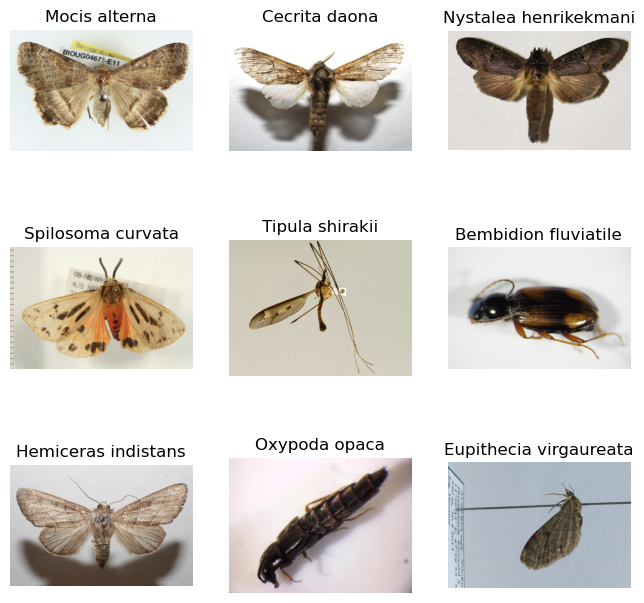

In [3]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(dataset), size=(1,)).item()
    img, label = dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    species_name = (list(dataset.class_to_idx.keys())[label]).replace('_',' ')
    plt.title(species_name)
    plt.axis("off")
    plt.imshow(img, cmap="gray")
plt.show()

In [4]:
list(dataset.class_to_idx.keys())[5]

'Acrolophus_forbesi'

In [5]:
asd = list(df['image_urls'])[0]
asd[asd.rfind('/')+1:]


'10ANIC_08059+1288052608.jpg'

In [6]:
list(df['image_urls'])

['http://v3.boldsystems.org/pics/ANICL/10ANIC_08059+1288052608.jpg',
 'http://v3.boldsystems.org/pics/BCHYM/BC_ZSM_HYM_24216+1440710108.jpg',
 'http://v3.boldsystems.org/pics/BCHYM/BC-ZSM-HYM-27761-D07+1429045164.jpg',
 'http://v3.boldsystems.org/pics/BLPBC/06-SRNP-109430_DHJ609430+1199992320.jpg',
 'http://v3.boldsystems.org/pics/BLPBE/07-SRNP-101378_DHJ611342+1174583648.jpg',
 'http://v3.boldsystems.org/pics/BLNOA/07-SRNP-106954_DHJ616918+1188495614.jpg',
 'http://v3.boldsystems.org/pics/BLNOA/07-SRNP-112250_DHJ622214+1202911152.jpg',
 'http://v3.boldsystems.org/pics/BLNOA/07-SRNP-113574_DHJ623538+1204038314.jpg',
 'http://v3.boldsystems.org/pics/BLPDE/08-SRNP-108981-DHJ633045+1364926698.jpg',
 'http://v3.boldsystems.org/pics/BLPEE/12-SRNP-100569-DHJ667502+1344956152.JPG',
 'http://v3.boldsystems.org/pics/CGUKC/IMG_9917+1238606356.JPG',
 'http://v3.boldsystems.org/pics/COLFC/ZMUO.003008+1335376308.JPG',
 'http://v3.boldsystems.org/pics/COLFD/ZMUO.003858+1350573868.JPG',
 'http://v3.b

In [7]:
df = df[['processid','genus_name','species_name','nucleotide','image_urls']]

In [8]:
for r in dataset.imgs:
    if 'Drosophila_affinis' in r[0]:
        print(r[0])

image_dataset/Drosophila_affinis/09bbdip-0450+1256830756.JPG
image_dataset/Drosophila_affinis/09bbdip-0483+1256841826.JPG
image_dataset/Drosophila_affinis/09bbdip-0949+1259076786.JPG
image_dataset/Drosophila_affinis/09bbdip-0950+1259076800.JPG
image_dataset/Drosophila_affinis/09bbdip-0953+1259249498.JPG
image_dataset/Drosophila_affinis/09bbdip-0985+1259253548.JPG
image_dataset/Drosophila_affinis/09bbdip-1134+1259247346.JPG
image_dataset/Drosophila_affinis/09bbdip-1137+1259245256.JPG
image_dataset/Drosophila_affinis/09bbdip-1289+1259676206.JPG
image_dataset/Drosophila_affinis/09bbdip-1301+1259677668.JPG
image_dataset/Drosophila_affinis/09bbdip-1305+1259678440.JPG
image_dataset/Drosophila_affinis/09bbdip-2063+1274379732.jpg
image_dataset/Drosophila_affinis/09bbdip1466+1261064920.JPG
image_dataset/Drosophila_affinis/DasguptaRishiFC2Fly1.1+1550256764.jpg
image_dataset/Drosophila_affinis/Duke.Bio203L.S19.FA2.3+1550258360.jpg
image_dataset/Drosophila_affinis/FA1.FlyA_cropped+1581701421.JPG
i

# For all the images in tha dataset we get the corresponding bold_id

In [9]:
img2dna = dict()
not_found_images = []
for i, row in df.iterrows():
    urls = row['image_urls'].split('|')
    species_name = row['species_name'].replace(' ','_')
    #if len(urls) >1 and row['species_name'] == 'Drosophila affinis':
    for url in urls:
        image_name_csv ='image_dataset/'+species_name+'/'+url[url.rfind('/')+1:]
        #print(image_name_csv)
        trovato = False
        for img in dataset.imgs:
            if img[0] == image_name_csv:
                img2dna[img[0]]= row['processid']
                trovato = True
                break
        if not trovato:
            not_found_images.append(image_name_csv)
        
        

In [10]:
img2dna

{'image_dataset/Leucania_cruegeri/10ANIC_08059+1288052608.jpg': 'ANICL062-10',
 'image_dataset/Lestica_alata/BC_ZSM_HYM_24216+1440710108.jpg': 'BCHYM11106-15',
 'image_dataset/Liotryphon_punctulatus/BC-ZSM-HYM-27761-D07+1429045164.jpg': 'BCHYM7643-15',
 'image_dataset/Lesmone_formularis/06-SRNP-109430_DHJ609430+1199992320.jpg': 'BLPBC407-07',
 'image_dataset/Lesmone_formularis/07-SRNP-101378_DHJ611342+1174583648.jpg': 'BLPBE439-07',
 'image_dataset/Lesmone_formularis/07-SRNP-106954_DHJ616918+1188495614.jpg': 'BLPCC469-08',
 'image_dataset/Lesmone_formularis/07-SRNP-112250_DHJ622214+1202911152.jpg': 'BLPCI125-08',
 'image_dataset/Lesmone_formularis/07-SRNP-113574_DHJ623538+1204038314.jpg': 'BLPCJ509-08',
 'image_dataset/Lesmone_formularis/08-SRNP-108981-DHJ633045+1364926698.jpg': 'BLPDE146-09',
 'image_dataset/Lesmone_gentilis/12-SRNP-100569-DHJ667502+1344956152.JPG': 'BLPEE570-12',
 'image_dataset/Leucania_comma/IMG_9917+1238606356.JPG': 'CGUKC237-09',
 'image_dataset/Limodromus_assimi

In [11]:
dataset

Dataset ImageFolder
    Number of datapoints: 32424
    Root location: image_dataset/

In [12]:
df

,processid,genus_name,species_name,nucleotide,image_urls
0,ANICL062-10,Leucania,Leucania cruegeri,TACATTATATTTTATTTTTGGAATTTGAGCTGGTATAGTTGGAACT...,http://v3.boldsystems.org/pics/ANICL/10ANIC_08...
1,BCHYM11106-15,Lestica,Lestica alata,AATTTTATATTTTATATTTGCTTTATGAGCAGGTATATTGGGAACA...,http://v3.boldsystems.org/pics/BCHYM/BC_ZSM_HY...
2,BCHYM7643-15,Liotryphon,Liotryphon punctulatus,AGTTTTATATTTTATTTTTGGAATATGAGCAGGAATAATTGGATCA...,http://v3.boldsystems.org/pics/BCHYM/BC-ZSM-HY...
3,BLPBC407-07,Lesmone,Lesmone formularis,--AACTTTATATTTCATTTTTGGTATTTGAGCAGGTATAGTAGGAA...,http://v3.boldsystems.org/pics/BLPBC/06-SRNP-1...
4,BLPBE439-07,Lesmone,Lesmone formularis,--AACTTTATATTTCATTTTTGGTATTTGAGCAGGTATAGTAGGAA...,http://v3.boldsystems.org/pics/BLPBE/07-SRNP-1...
...,...,...,...,...,...
418,BLPDT177-10,Hemiceras,Hemiceras losa,AACATTATATTTTATTTTTGGAATTTGAGCAGGTATAGTAGGAACT...,http://v3.boldsystems.org/pics/BLPDT/10-SRNP-1...
419,BLPDU168-11,Hemiceras,Hemiceras nigrescens,AACATTATATTTTATTTTTGGAATTTGGGCAGGTATAGTAGGAACT...,http://v3.boldsystems.org/pics/BLPDU/10-SRNP-1...
420,BLPDZ552-11,Hemiceras,Hemiceras nigrescens,AACATTATATTTTATTTTTGGAATTTGGGCAGGTATAGTAGGAACT...,http://v3.boldsystems.org/pics/BLPDZ/11-SRNP-1...
421,BLPDZ678-11,Hemiceras,Hemiceras punctata,AACATTATATTTCATTTTTGGAATTTGAGCTGGAATAGTGGGGACT...,http://v3.boldsystems.org/pics/BLPDZ/11-SRNP-1...


In [13]:
dataset.imgs

[('image_dataset/Abax_parallelepipedus/BCZSMCOL00690+1280851812.JPG', 0),
 ('image_dataset/Abax_parallelepipedus/BCZSMCOLA00185+1280478874.JPG', 0),
 ('image_dataset/Abax_parallelepipedus/BCZSM_COLA_01787+1350414822.jpg', 0),
 ('image_dataset/Abax_parallelepipedus/BCZSM_COLA_01788+1350414964.jpg', 0),
 ('image_dataset/Abax_parallelepipedus/BC_ZSM_COL_02878+1311934584.jpg', 0),
 ('image_dataset/Abax_parallelepipedus/BC_ZSM_COL_05487+1338577126.JPG', 0),
 ('image_dataset/Abax_parallelepipedus/BFB_Col_FK_5972+1333050320.jpg', 0),
 ('image_dataset/Abax_parallelepipedus/BFB_Col_FK_7375+1337552628.jpg', 0),
 ('image_dataset/Abax_parallelepipedus/GBOL_Col_FK_1256+1340404874.jpg', 0),
 ('image_dataset/Abax_parallelepipedus/GBOL_Col_FK_2929+1348946596.jpg', 0),
 ('image_dataset/Abax_parallelepipedus/GBOL_Col_FK_4584+1371158812.jpg', 0),
 ('image_dataset/Abax_parallelus/BCZSMCOL02125+1285856712.JPG', 1),
 ('image_dataset/Abax_parallelus/BCZSMCOLA00186+1280478894.JPG', 1),
 ('image_dataset/Abax_p

In [14]:
def data_split(df, test_ratio):
    test = []
    genus_count = df.groupby('genus_name')['species_name'].nunique()
    
    for genus_name in genus_count.index:
        number_undescribed_species = genus_count[genus_name]//3
        species = list(df.loc[df['genus_name']==genus_name]['species_name'].unique())
        undescribed_species = random.sample(species,number_undescribed_species)
        test = test+undescribed_species

    df_remaining = df.loc[~df.species_name.isin(test)]
    df_undescribed = df.loc[df.species_name.isin(test)]
    
    y = df_remaining['species_name']
    X = df_remaining.drop(columns=['species_name'])
    
    y_undescribed = df_undescribed['species_name']
    X_undescribed = df_undescribed.drop(columns=['species_name'])
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=42)
    
    y_test = pd.concat([y_test,y_undescribed])
    X_test = pd.concat([X_test,X_undescribed])

    return X_train, X_test, y_train, y_test

In [15]:
import random
from sklearn.model_selection import train_test_split

random.seed(42)
X_train_1, X_test, y_train_1, y_test = data_split(df,0.3)

train_data = X_train_1
train_data['species_name'] = y_train_1

X_train, X_validation, y_train, y_validation = data_split(train_data,0.2)

In [17]:
print(f'Training size: {X_train.shape[0]}\nValidation size: {X_validation.shape[0]}\nTest size: {X_test.shape[0]}\n')
print(df.shape[0])
print(X_train_1.shape[0] + X_test.shape[0])
print(train_data.shape[0] + X_test.shape[0])
print(X_train.shape[0] + X_validation.shape[0] + X_test.shape[0])

Training size: 9125
Validation size: 5299
Test size: 12052

26476
26476
26476
26476


In [22]:
s

array(['Nola cucullatella', 'Bledius opacus', 'Stenurella bifasciata',
       ..., 'Tachyta nana', 'Hemiceras zula', 'Toxomerus marginatus'],
      dtype=object)